# Ôn tập giữa kỳ


In [171]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

## ĐỀ BÀI

Hệ thống giám sát rủi ro dựa trên hành vi (The Behavior Risk Factor Surveilance System - BRFSS) là một cuộc khảo sát qua điện thoại hàng năm với 350.000 người ở Hoa Kỳ. Như tên gọi của nó, BRFSS được thiết kế để xác định các yếu tố nguy cơ ở người trưởng thành và báo cáo các xu hướng sức khỏe mớ. Ví dụ, người trả lời được hỏi về chế độ ăn uống và hoạt động thể chất hàng tuần, tình trạng HIV/AIDS, khả năng sử dụng thuốc lá và thậm chí cả mức độ chi trả dịch vụ chăm sóc sức khỏe của họ. 

Bộ dữ liệu **brfss_2000** chứa thông tin khảo sát năm 2000, với hơn 200 thông tin. Trong bộ dữ liệu này, ta chỉ khảo sát một số thông tin sau:
-	genhlth: người khảo sát tự đánh giá sức khỏe (excellent, very good, good, fair or poor)
-	exerany: cho biết có hoạt động thể chất nào trong tháng gần nhất hay không, có (1), không (0)
-	hlthplan: có bảo hiểm (1) hay không (0)
-	smoke100: tổng số điếu thuốc đã hút ít nhất
-	height: chiều cao (inches)
-	weight: cân nặng (pounds)
-	wtdesire:  cân nặng mong muốn(pounds)
-	age: tuổi
-	gender: giới tính: nam(m), nữ(f)


### Câu 1:

Đọc hai bộ dữ liệu trên và cho biết mỗi bộ dữ liệu có kích thước bao nhiêu dòng, bao nhiêu cột?

In [172]:
brfss = pd.read_csv('datasets/brfss_2000.csv', header=0)
brfss_size = brfss.shape[0]

print('so dong:', brfss.shape[0], ', so cot:', brfss.shape[1])

so dong: 20000 , so cot: 9


### Câu 2

a, Tính tỷ lệ nam nữ

b, Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là bao nhiêu?

In [173]:
df_male = brfss[brfss['gender'] == 'm'].copy()
df_female = brfss[brfss['gender'] == 'f'].copy()

print("tỉ lệ nam:", df_male.shape[0] / brfss_size * 100)
print("tỉ lệ nữ:", df_female.shape[0] / brfss_size * 100)

df_exerany = brfss[brfss['exerany'] == 1]
df_genhlth = df_exerany[df_exerany['genhlth'].isin(['fair', 'poor'])]

print("Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là:", df_genhlth.shape[0] / df_exerany.shape[0] * 100)

tỉ lệ nam: 47.845
tỉ lệ nữ: 52.154999999999994
Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là: 9.755934021724553


### Câu 3

a, Đổi đơn vị chiều cao từ inches sang centimet, đơn vị cân nặng từ pound sang kg.

b, Tính tỷ lệ những người muốn giảm cân.

In [174]:
# a
brfss['height'] = brfss['height'] * 2.54
brfss[['weight', 'wtdesire']] = brfss[['weight', 'wtdesire']] * 0.453592

df_giamcan = brfss[brfss['wtdesire']  < brfss['weight']]
print('tỷ lệ những người muốn giảm cân:', df_giamcan.shape[0] / brfss_size * 100)

tỷ lệ những người muốn giảm cân: 63.82


### Câu 4:

a, Theo bạn trong các thuộc tính trên, thuộc tính nào có phân phối chuẩn. Vẽ hình minh họa

b, Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục

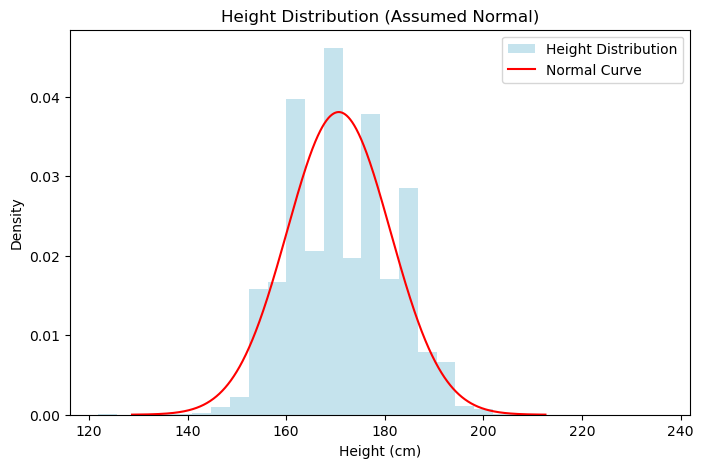

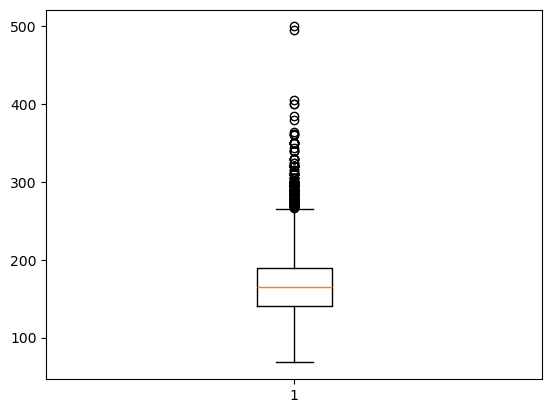

In [175]:
plt.figure(figsize=(8, 5))
plt.hist(brfss['height'], bins=30, density=True, color='lightblue', alpha=0.7, label='Height Distribution')

mean = brfss['height'].mean()
std = brfss['height'].std()
x = np.linspace(mean - 4 * std, mean + 4 * std, 1000)
plt.plot(x, norm.pdf(x, mean, std), color='red', label='Normal Curve')

plt.title('Height Distribution (Assumed Normal)')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.show()

plt.boxplot(x=df_exerany['weight'])
plt.show()


### Câu 5

Phân bố tuổi tác trong mẫu: Hãy mô tả phân bố tuổi của người tham gia khảo sát. Tuổi trung bình, độ lệch chuẩn, và các phân vị 25%, 50%, 75% là bao nhiêu?



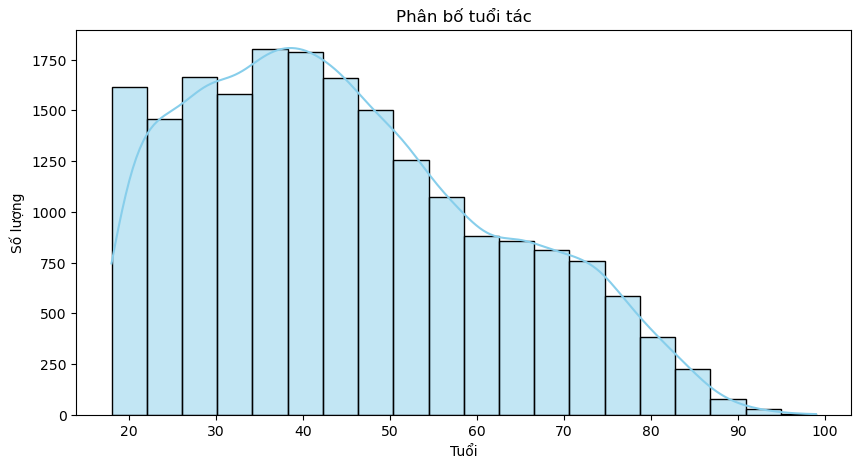

tuổi trung bình: 45.06825
độ lệch chuẩn: 17.19268947448475
phân vị 25, 50, 75: [31.0, 43.0, 57.0]


In [176]:
plt.figure(figsize=(10, 5))
sns.histplot(brfss['age'], bins=20, kde=True, color='skyblue')
plt.title('Phân bố tuổi tác')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.show()

print('tuổi trung bình:', brfss['age'].mean())
print('độ lệch chuẩn:', brfss['age'].std())
print('phân vị 25, 50, 75:', brfss['age'].quantile([0.25, 0.5, 0.75]).tolist())

### Câu 6

Tỉ lệ người hút thuốc: Tính tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá. Liệu có sự khác biệt đáng kể về tỉ lệ này giữa các nhóm tuổi khác nhau không?



tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá: 47.205000000000005


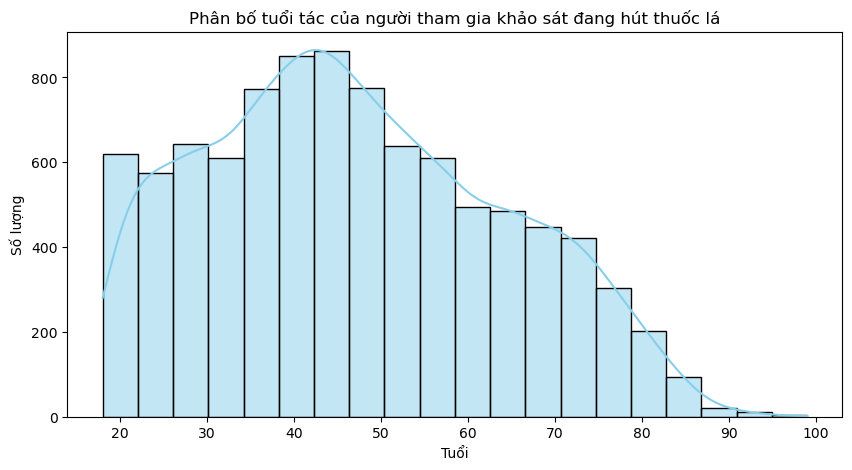

In [177]:
df_smoke = brfss[brfss['smoke100'] == 1]

print('tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá:', df_smoke.shape[0] / brfss_size * 100)

plt.figure(figsize=(10, 5))
sns.histplot(df_smoke['age'], bins=20, kde=True, color='skyblue')
plt.title('Phân bố tuổi tác của người tham gia khảo sát đang hút thuốc lá')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.show()

Có sự khác biệt đáng kể từ 40 tuổi trở đi, số lượng người hút càng giảm

### Câu 7

BMI trung bình theo giới tính: Tính chỉ số BMI trung bình cho nam và nữ trong mẫu. 



In [178]:
df_male['height'] = df_male['height'] * 2.54 / 100
df_male['weight'] = df_male['weight'] * 0.453592

df_female['height'] = df_female['height'] * 2.54 / 100
df_female['weight'] = df_female['weight'] * 0.453592

df_male['bmi'] = df_male['weight'] / (df_male['height'] ** 2)
df_female['bmi'] = df_female['weight'] / (df_female['height'] ** 2)
print("BMI trung bình của nam:", df_male['bmi'].mean())
print("BMI trung bình của nữ:", df_female['bmi'].mean())

BMI trung bình của nam: 26.926312597397818
BMI trung bình của nữ: 25.743674115903904


### câu 8

Phân tích tỉ lệ bệnh béo phì: Sử dụng các tiêu chuẩn của CDC về chỉ số BMI để phân loại người tham gia vào nhóm béo phì. Tính tỉ lệ béo phì theo giới tính và độ tuổi. 

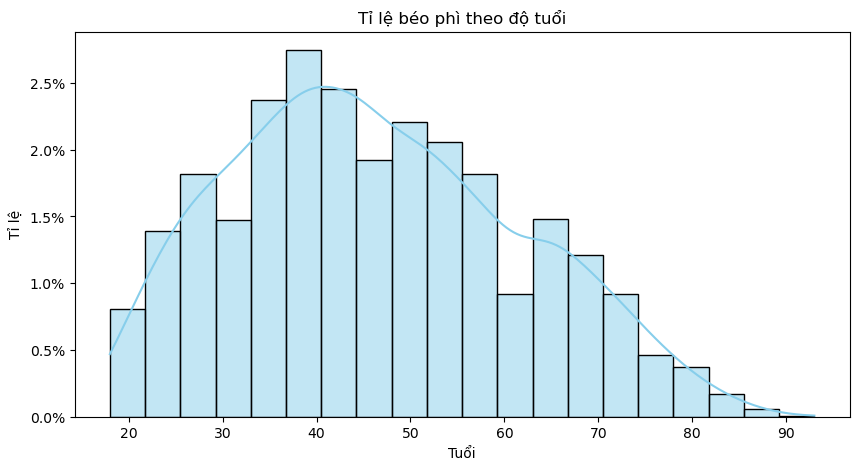

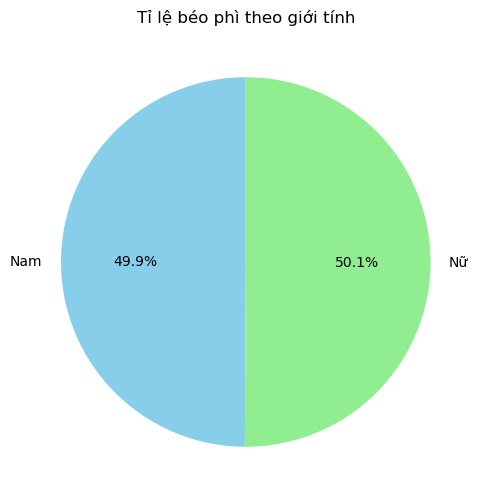

In [179]:
brfss['height'] = brfss['height'] / 100
brfss['bmi'] = brfss['weight'] / (brfss['height'] ** 2)

# Categorize BMI according to CDC classification
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obesity Class I'
    elif 35 <= bmi < 40:
        return 'Obesity Class II'
    else:
        return 'Obesity Class III'

def is_obesity(bmi):
    if bmi >= 30:
        return 'y'
    else:
        return 'n'

# brfss['bmi_category'] = brfss['bmi'].apply(categorize_bmi)
brfss['is_obesity'] = brfss['bmi'].apply(is_obesity)
df_male['is_obesity'] = df_male['bmi'].apply(is_obesity)
df_female['is_obesity'] = df_female['bmi'].apply(is_obesity)


plt.figure(figsize=(10, 5))
sns.histplot(brfss[brfss['is_obesity'] == 'y']['age'], bins=20, kde=True, color='skyblue', stat='density')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.1f}%'))
plt.title('Tỉ lệ béo phì theo độ tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Tỉ lệ')
plt.show()

plt.figure(figsize=(6, 6))
colors = ['skyblue', 'lightgreen']
sizes = [
    len(df_male[df_male['is_obesity'] == 'y']),  # Số lượng nam béo phì
    len(df_female[df_female['is_obesity'] == 'y'])  # Số lượng nữ béo phì
]

plt.pie(
    sizes, labels=['Nam', 'Nữ'], colors=colors, 
    autopct='%1.1f%%', startangle=90
)
plt.title('Tỉ lệ béo phì theo giới tính')
plt.show()

---